In [321]:
import sys
sys.path.append('../')

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from architectures.LeNet5 import LeNet5, SubSamplingLayer, C3Conv2DLayer
from src.helpers import Device, train
from src.metrics import Accuracy

import matplotlib.pyplot as plt
%matplotlib inline 

In [309]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [310]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 1

IMG_SIZE = 32
N_CLASSES = 10

In [311]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

In [312]:
# download and create datasets
train_dataset = datasets.MNIST(root='./mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='./mnist_data', 
                               train=False, 
                               transform=transforms)

In [313]:
# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True,num_workers=5)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=1100*BATCH_SIZE, 
                          shuffle=False,num_workers=5)

In [314]:
batch, y = next(iter(train_loader))
batch.shape

torch.Size([32, 1, 32, 32])

# Training

In [315]:
torch.manual_seed(RANDOM_SEED)
device = Device().get()
model = LeNet5(N_CLASSES).to(device)

In [316]:
model

LeNet5(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Atanh()
    (2): SubSamplingLayer(
      (conv): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1), groups=6)
    )
    (3): Sigmoid()
    (4): C3Conv2DLayer(
      (conv): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    )
    (5): Atanh()
    (6): SubSamplingLayer(
      (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), groups=16)
    )
    (7): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (8): Atanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Atanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [317]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

21:14:30 --- Epoch: 0	Train loss: 0.2755	Valid loss: 0.1104	Accuracy: 0.9692	Validation Accuracy: 0.9660
21:15:15 --- Epoch: 1	Train loss: 0.0881	Valid loss: 0.0586	Accuracy: 0.9845	Validation Accuracy: 0.9814
21:16:01 --- Epoch: 2	Train loss: 0.0619	Valid loss: 0.0571	Accuracy: 0.9853	Validation Accuracy: 0.9823
21:17:02 --- Epoch: 3	Train loss: 0.0499	Valid loss: 0.0527	Accuracy: 0.9892	Validation Accuracy: 0.9838
21:17:46 --- Epoch: 4	Train loss: 0.0408	Valid loss: 0.0458	Accuracy: 0.9903	Validation Accuracy: 0.9849
21:18:32 --- Epoch: 5	Train loss: 0.0342	Valid loss: 0.0480	Accuracy: 0.9928	Validation Accuracy: 0.9845
21:19:24 --- Epoch: 6	Train loss: 0.0307	Valid loss: 0.0472	Accuracy: 0.9924	Validation Accuracy: 0.9859
21:20:09 --- Epoch: 7	Train loss: 0.0276	Valid loss: 0.0489	Accuracy: 0.9926	Validation Accuracy: 0.9847
21:20:52 --- Epoch: 8	Train loss: 0.0245	Valid loss: 0.0484	Accuracy: 0.9944	Validation Accuracy: 0.9855
21:21:39 --- Epoch: 9	Train loss: 0.0226	Valid loss: 0.

../src/helpers.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


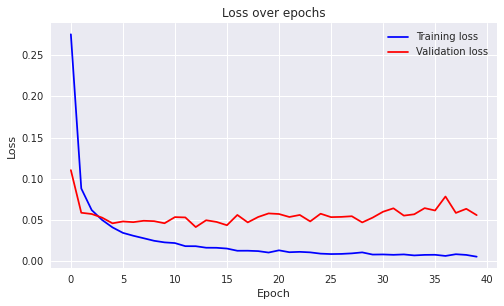

In [322]:
model, optimizer, (train_losses, valid_losses) = train(model, criterion, optimizer, train_loader, valid_loader, 40, device, eval_metrics=[Accuracy()])